In [2]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
print(tf.__version__)

2.18.0


In [3]:
observation=70000
xs = np.random.uniform(low=-10,high=10, size=(observation,1))
zs = np.random.uniform(low=-10,high=10,size=(observation,1))
inputs=np.column_stack((xs,zs))
print(inputs.shape)

(70000, 2)


In [4]:
noise = np.random.uniform(low=-1,high=1, size=(observation,1))
targets = 17*xs - 6*zs - 2 + noise
np.savez('TF_dataset',inputs=inputs,targets=targets)
print(targets.shape)

(70000, 1)


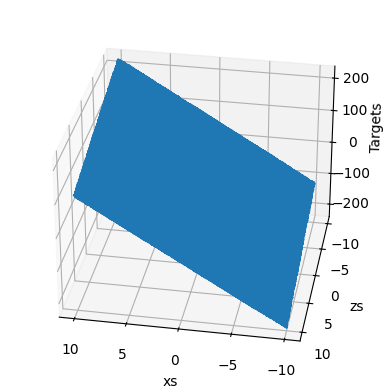

In [5]:
targets = targets.reshape(observation,)
xs = xs.reshape(observation,)
zs = zs.reshape(observation,)
fig = plt .figure()
ax = fig.add_subplot(111,projection='3d')
ax.plot(xs,zs,targets)
ax.set_xlabel('xs')
ax.set_ylabel('zs')
ax.set_zlabel('Targets')
ax.view_init(azim=100)
plt.show()

In [6]:
from os import initgroups
init_range = 0.1
weights = np.random.uniform(low=-init_range,high=init_range, size=(2,1))
biases = np.random.uniform(low=-init_range,high=init_range,size=1)
print(weights,biases)

[[-0.06297402]
 [ 0.04758944]] [-0.05837312]


In [7]:
targets = targets.reshape(observation,1)
eta = 0.01
for i in range(100):
    outputs = np.dot(inputs,weights) + biases
    deltas = outputs - targets
    loss = np.sum(deltas ** 2) / 2 / observation
    print(loss)
    deltas_scaled = deltas/observation
    weights = weights - eta * np.dot(inputs.T,deltas_scaled)
    biases = biases - eta * np.sum(deltas_scaled)

5464.337190040601
2429.252908022679
1080.5764119872663
481.2557849296031
214.91685780469953
96.54318628668169
43.9212265135459
20.51817744464308
10.099900564940883
5.452292244127372
3.369506163264225
2.4268833951736117
1.9913004198998703
1.7813867879329575
1.672091286243797
1.607832210347637
1.5639012154395835
1.5293108588391633
1.499171779418975
1.4713049413962391
1.444736012271635
1.419026206383485
1.393974879884353
1.3694873463576758
1.3455161240707718
1.322034820179208
1.2990265208046172
1.2764786285475545
1.2543805657674278
1.2327227516870665
1.2114961457401985
1.190692042651982
1.1703019794546536
1.1503176922975868
1.13073109542903
1.111534270069786
1.0927194577199364
1.0742790554708317
1.0562056122427532
1.0384918254673863
1.0211305380008153
1.0041147351710602
0.9874375419169485
0.9710922199983021
0.9550721652680796
0.9393709050017122
0.9239820952807638
0.9088995184293414
0.8941170805016362
0.8796288088196966
0.8654288495601509
0.851511465389049
0.8378710331437342
0.824502041560

In [8]:
print(weights,biases)

[[16.99938154]
 [-6.00070841]] [-1.2862208]


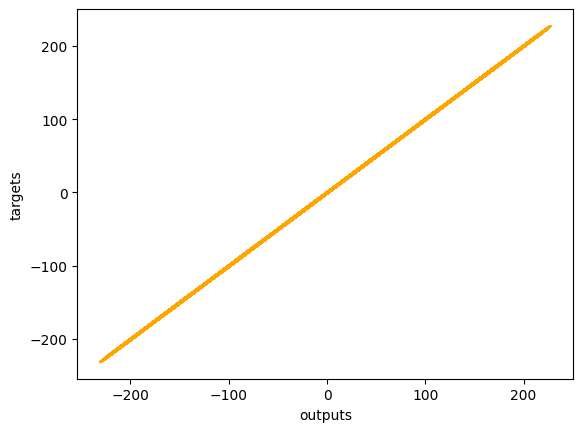

In [9]:
plt.plot(outputs,targets, color='orange')
plt.xlabel('outputs')
plt.ylabel('targets')
plt.show()